In [13]:
### General import
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Read input file
df = pd.read_csv('opsd_austria_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)



In [14]:
df.tail()

,Electricity_consumption,Wind_production,Solar_production,Price,Wind+Solar
Date,,,,,
2020-09-26,140.644,49.182,1.593,NaN,50.775
2020-09-27,130.375,12.691,2.909,NaN,15.600
2020-09-28,167.944,18.185,0.685,NaN,18.870
2020-09-29,166.983,29.281,2.091,NaN,31.372
2020-09-30,166.657,47.345,NaN,NaN,NaN


In [15]:
#df.loc['2018-01-01':'2018-09-30']['Price']

In [16]:
df['Wind_production'].fillna(value=df['Wind_production'].mean(), inplace=True)
df['Solar_production'].fillna(value=df['Wind_production'].mean(), inplace=True)

In [17]:
df['Wind+Solar']=df['Wind_production']+df['Solar_production']

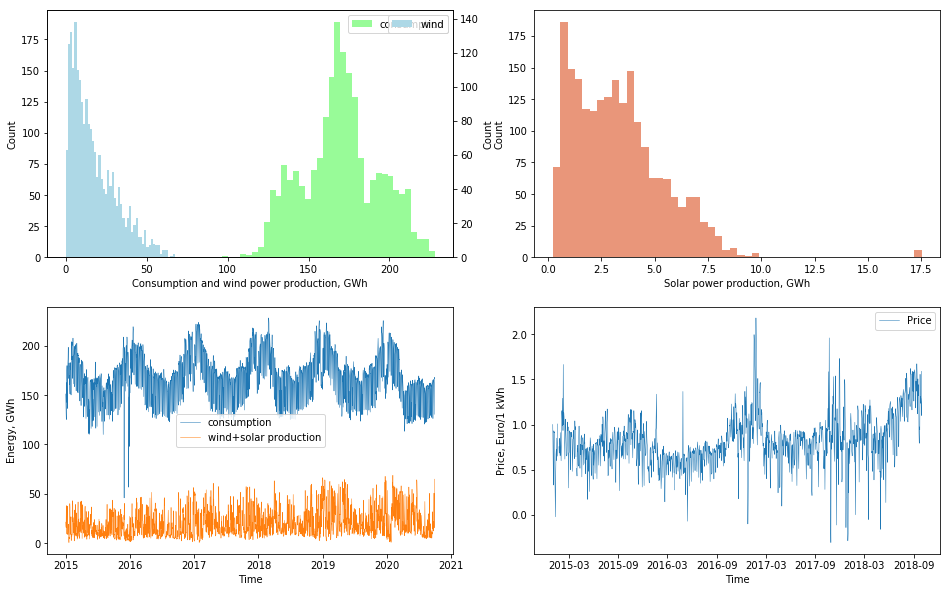

In [18]:
# Task 1a: visualize distribution & time changes of input data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
# Distribution of electricity consumption & wind production
ax[0,0].hist(df['Electricity_consumption'], bins=50, color='palegreen', label='consumption') # put here electricity consumption values
ax[0,0].set_xlabel('Consumption and wind power production, GWh')
ax[0,0].set_ylabel('Count')

ax2 = ax[0,0].twinx() # insert the double y-axis using twinx to display wind power production
ax2.hist(df['Wind_production'], bins=50, color='lightblue', label='wind') # put here wind power production values
ax2.set_ylabel('Count')
ax[0,0].legend(loc='best')
ax2.legend(loc='best')

# Distribution of solar power production
ax[0,1].hist(df['Solar_production'], bins=50, color='darksalmon') # put here solar power production values
ax[0,1].set_xlabel('Solar power production, GWh')
ax[0,1].set_ylabel('Count')



# Time series
ax[1,0].plot(df['Electricity_consumption'], linewidth = 0.5, label='consumption') # put here electricity consumption values
ax[1,0].plot(df['Wind+Solar'], linewidth = 0.5, label='wind+solar production') # put here merged wind + solar data values
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Energy, GWh')
ax[1,0].legend(loc='best')


# Price distribution
ax[1,1].plot(df['Price'], linewidth = 0.5) # substitute ... with spot price from the dataset
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Price, Euro/1 kWh')
ax[1,1].legend(loc='best')
plt.show()






#plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [19]:
# Task 1b: analysing the seasonality for 2019 year

df['Electricity_consumption_RA'] = df['Electricity_consumption'].rolling(window=15).mean()
df['Wind_production_RA'] = df['Wind_production'].rolling(window=15).mean()
df['Solar_production_RA'] = df['Solar_production'].rolling(window=15).mean()


In [20]:
a=df.loc['2019-01-01':'2019-12-31']['Solar_production_RA']


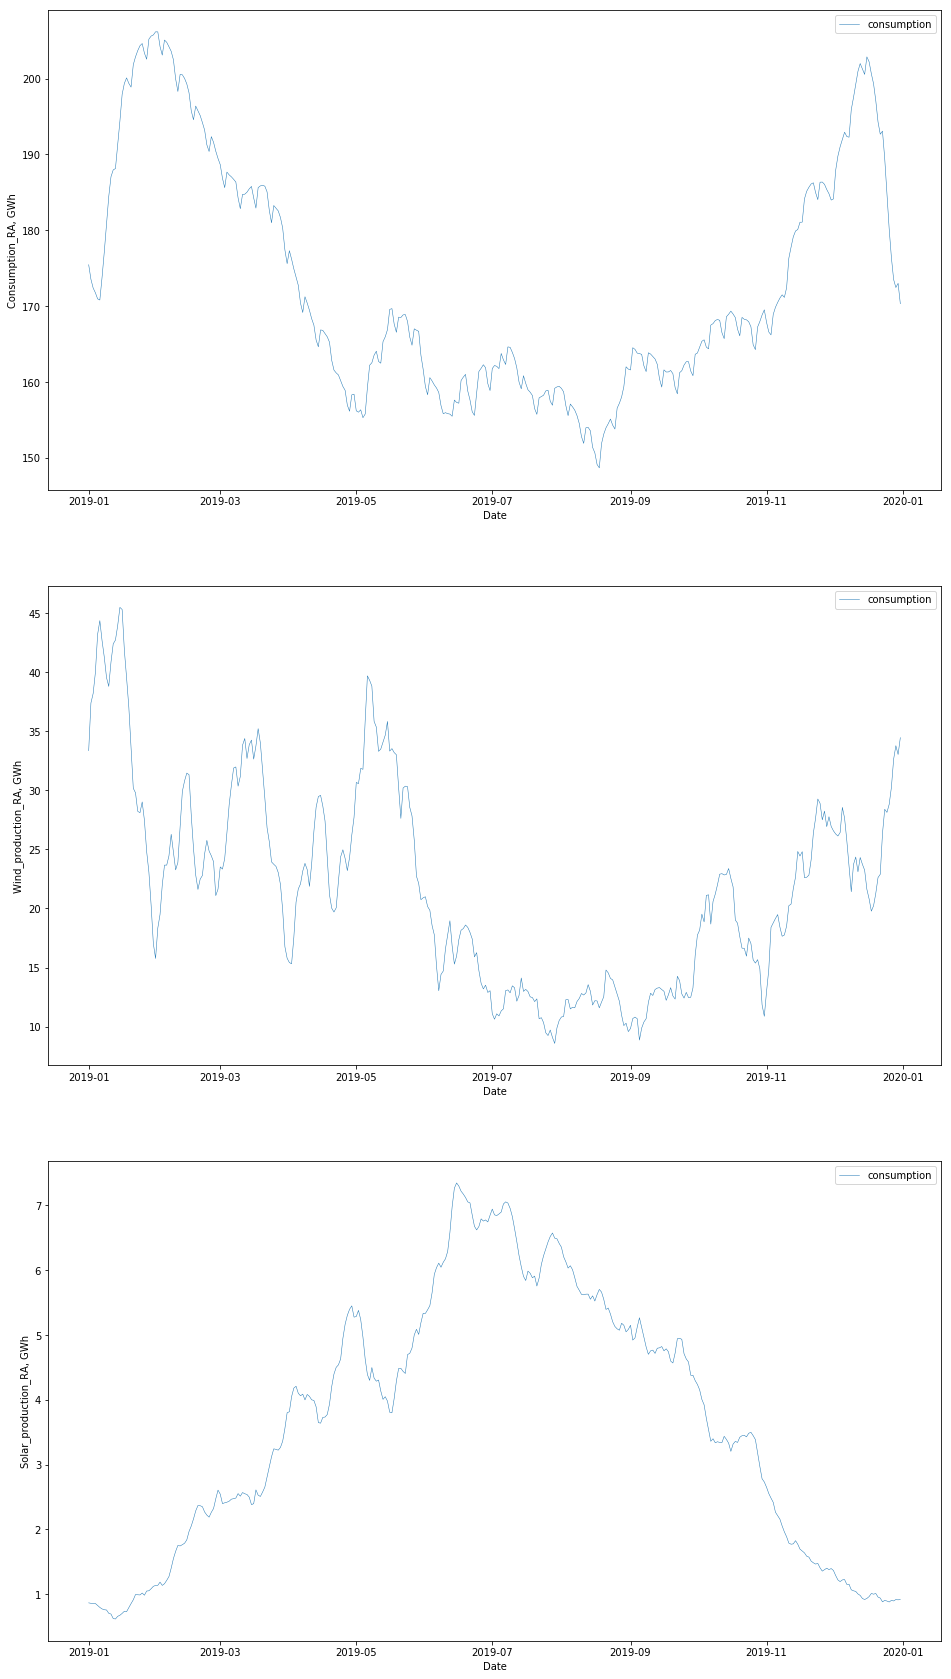

In [21]:

# Task 1b: visualize seasoning
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 30))
# Consumption
ax[0].plot(df.loc['2019-01-01':'2019-12-31']['Electricity_consumption_RA'], linewidth = 0.5, label='consumption') # put here electricity consumption values

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Consumption_RA, GWh')
ax[0].legend(loc='best')


# Wind power
ax[1].plot(df.loc['2019-01-01':'2019-12-31']['Wind_production_RA'], linewidth = 0.5, label='consumption') # put here electricity consumption values

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Wind_production_RA, GWh')
ax[1].legend(loc='best')




# Solar power
ax[2].plot(df.loc['2019-01-01':'2019-12-31']['Solar_production_RA'], linewidth = 0.5, label='consumption') # put here electricity consumption values

ax[2].set_xlabel('Date')
ax[2].set_ylabel('Solar_production_RA, GWh')
ax[2].legend(loc='best')


plt.show()








Как видно из графиков, наблюдается существенная зависимость потребляемой и добываемой энергии от сезона: в зимнее время наблюдается повышенное потребление энергии и зимой-весной высокие показатели добычи энергии ветра, летом же оба показателя идут на спад. Солнечная же энергия в наибольших объемах добывается в летнее и осеннее время (май-сентябрь), в то время как зимой данный показатель существенно снижается (вплоть до 7 раз)